### Importing Libraries


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.axes as ax

### loading data set


In [2]:
data = pd.read_csv('data_for_lr.csv')

In [3]:
data.head(10)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
5,36.0,32.463875
6,12.0,10.780897
7,81.0,80.763399
8,25.0,24.612151
9,5.0,6.963319


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [5]:
data.isnull().sum()

x    0
y    1
dtype: int64

### Data processing

In [6]:
data= data.dropna()
print("shape of the data: ",data.shape)

shape of the data:  (699, 2)


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       699 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 16.4 KB


### Splittng data

In [8]:
# training input and output
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output = np.array(data.y[0:500]).reshape(500,1)

#validation data input and output
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output = np.array(data.y[500:699]).reshape(199,1)


In [9]:
print(f"training input data shape = {train_input.shape}")
print(f"training output data shape = {train_output.shape}")
print(f"testing output data shape = {test_input.shape}")
print(f"testing output data shape = {test_output.shape}")

training input data shape = (500, 1)
training output data shape = (500, 1)
testing output data shape = (199, 1)
testing output data shape = (199, 1)


## Linear Regression

### Forward propogation

f(x) = m*x + c


In [10]:
def forward_propogation(train_input,parameters):
    m= parameters["m"]
    c=parameters["c"]

    prediction = np.multiply(m,train_input) + c
    
    return prediction

### Cost Function

summation(1/2n * (y-f(x))^2)

In [11]:
def cost_function(prediction, train_output):
    cost = np.mean((train_output - prediction) ** 2) * 0.5

    return cost

### Gradient Descent for BackPropogation

df = summ(f(x) - y)/n

dm = df * x

dc = df * 1

d(cost)/dm = d(cost)/derv(f) * df/dm

In [12]:
def backward_propogation(train_input,train_output,prediction):

    derivatives = dict()

    df = prediction - train_output
    dm = np.mean(np.multiply(df, train_input))
    dc = np.mean(df)

    derivatives["dm"] = dm
    derivatives["dc"] = dc

    return derivatives
    

### update Parameters

m = m - (learning_rate * dm)
c = c - (learing_rate * dc)

In [13]:
def update_parameters(parameters , derivatives , learning_rate):
    parameters["m"] = parameters["m"] - learning_rate * derivatives["dm"]
    parameters["c"] = parameters["c"] - learning_rate * derivatives["dc"]

    return parameters

### Model Training

In [14]:
def train(train_input,train_output, learning_rate , iters):

    # random parameters
    parameters = dict()
    parameters["m"]  = np.random.uniform(0,1) 
    parameters["c"]  = np.random.uniform(0,1)

    plt.figure()

    #loss
    loss = list()

    # iteration
    for i in range(iters):

        #forward propogation
        prediction = forward_propogation(train_input,parameters)

        #cost 
        cost = cost_function(prediction , train_output)

        loss.append(cost)
        print(f"Iteration : {i+1} , Loss : {cost}")

        #plot 
        fig, ax = plt.subplots()
        ax.plot(train_input,train_output,'+',label='Original')
        ax.plot(train_input,prediction,'*',label='Training')

        ax.legend()

        plt.plot(train_input,train_output,'+',label='Original')
        plt.plot(train_input,prediction,'*',label='Training')

        plt.show()

        #backpropogation
        derivatives = backward_propogation(train_input, train_output, prediction)

        #update the parameters
        parameters = update_parameters(parameters, derivatives , learning_rate)

    return parameters , loss

### Training

Iteration : 1 , Loss : 70.34799208062756


<Figure size 640x480 with 0 Axes>

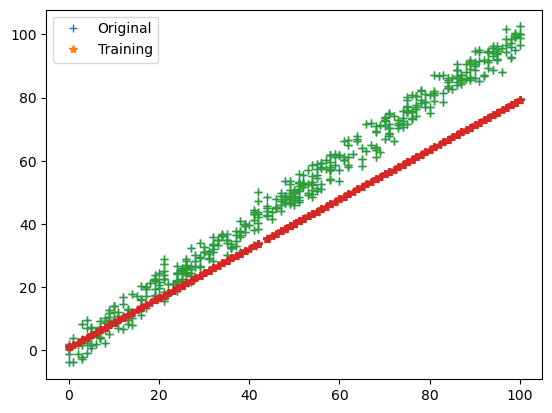

Iteration : 2 , Loss : 34.14522327669037


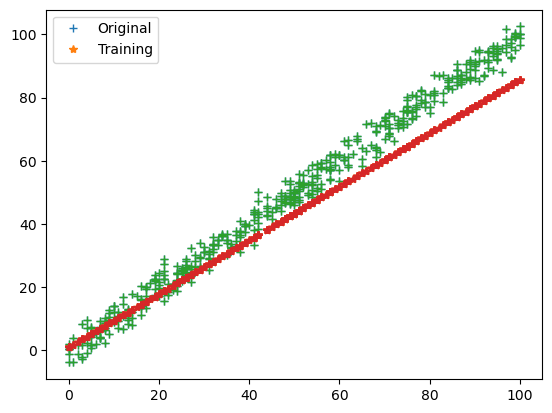

Iteration : 3 , Loss : 17.719982334514533


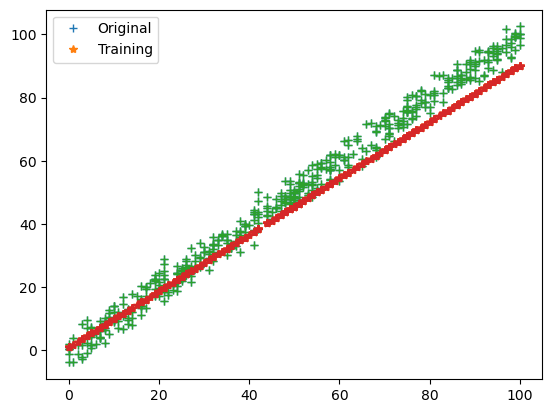

Iteration : 4 , Loss : 10.267827689858386


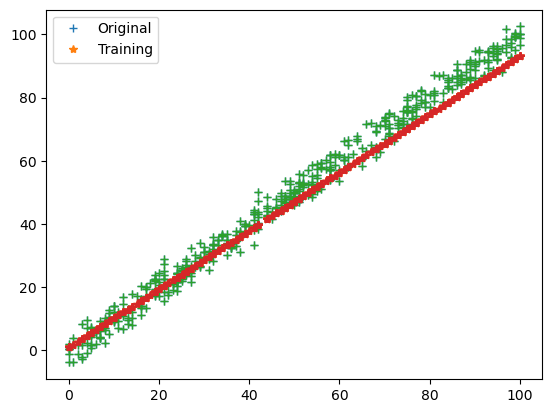

Iteration : 5 , Loss : 6.886772237580583


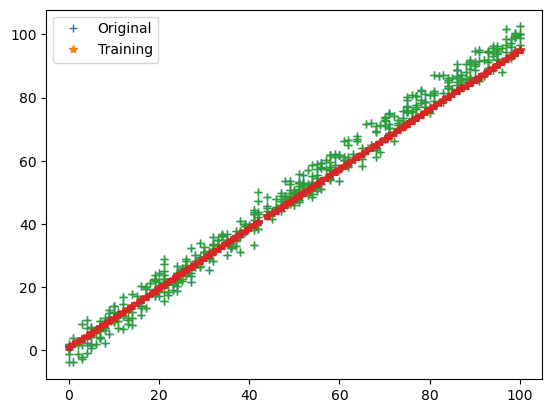

Iteration : 6 , Loss : 5.35277899843563


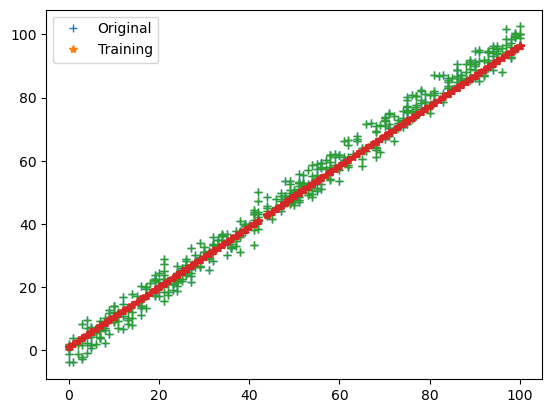

Iteration : 7 , Loss : 4.656799931504786


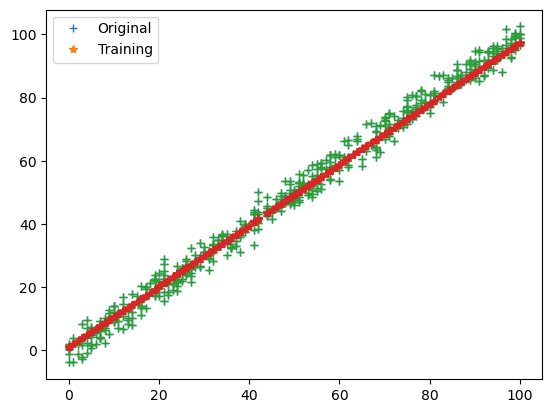

Iteration : 8 , Loss : 4.341028822960016


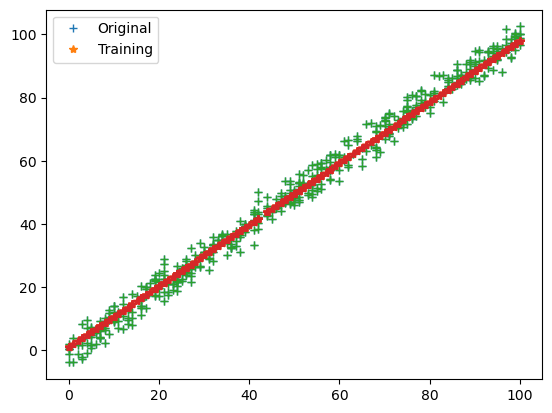

Iteration : 9 , Loss : 4.197758486502482


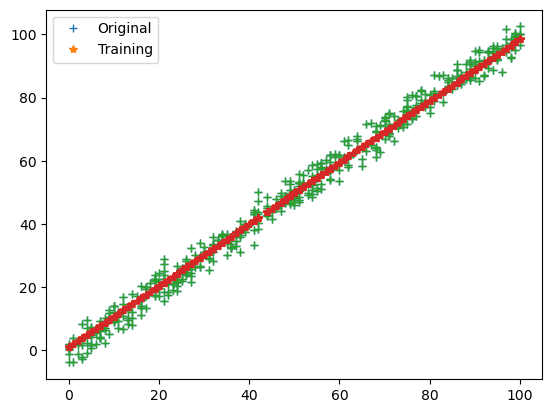

Iteration : 10 , Loss : 4.132751941643366


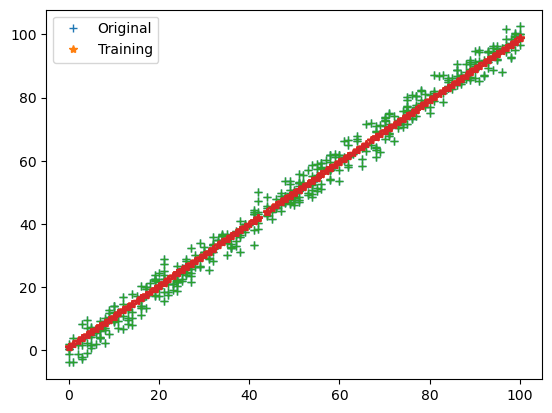

Iteration : 11 , Loss : 4.103253765954107


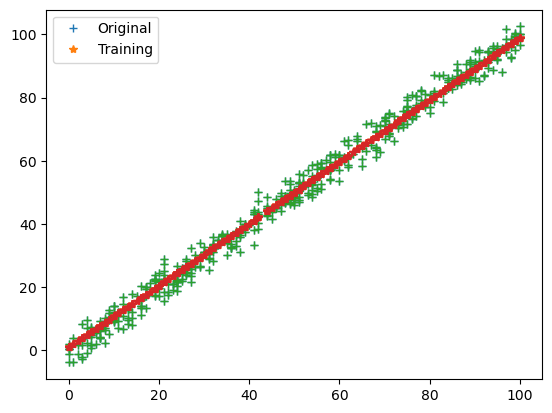

Iteration : 12 , Loss : 4.089865776921191


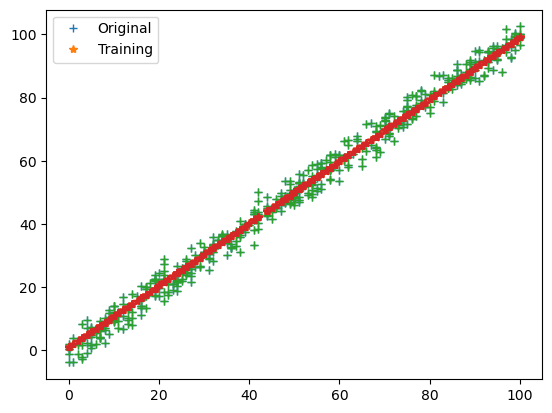

Iteration : 13 , Loss : 4.083786997651992


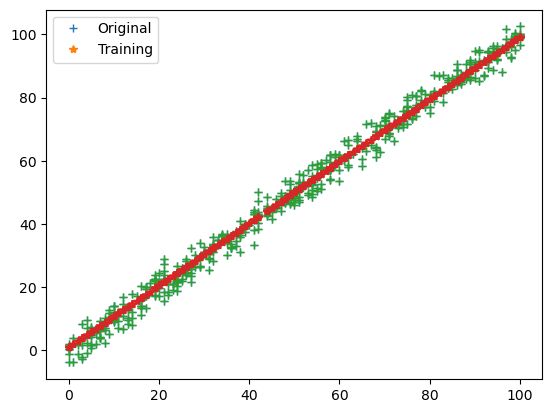

Iteration : 14 , Loss : 4.081024415181999


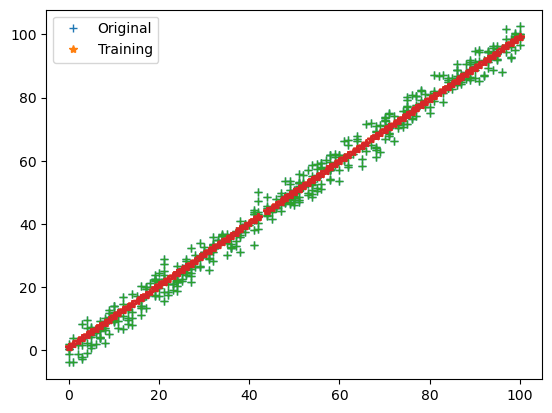

Iteration : 15 , Loss : 4.079766395106368


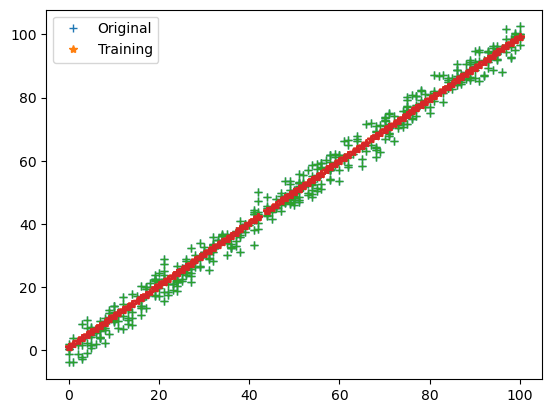

Iteration : 16 , Loss : 4.079190996888975


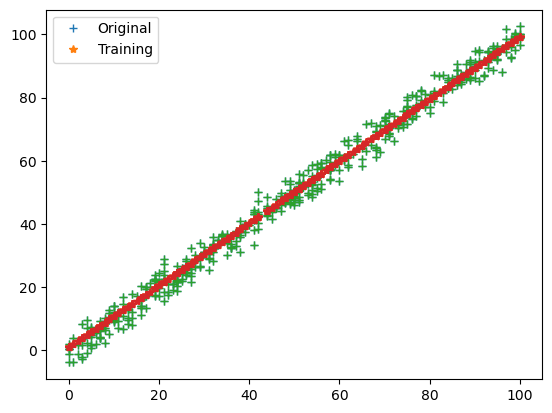

Iteration : 17 , Loss : 4.078925305198147


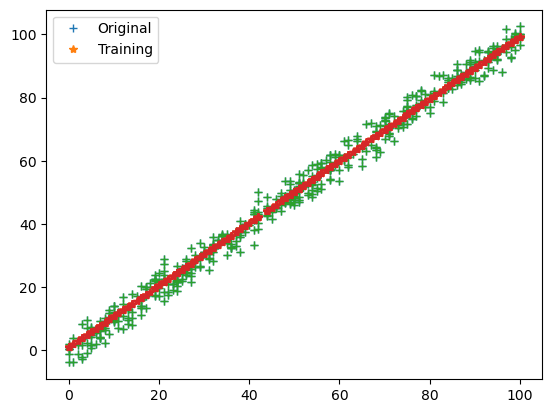

Iteration : 18 , Loss : 4.078800127934838


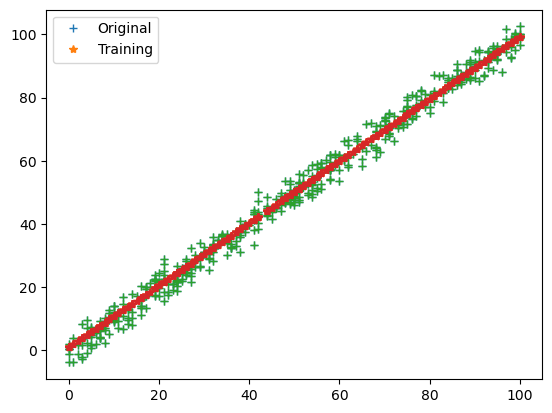

Iteration : 19 , Loss : 4.0787387024563


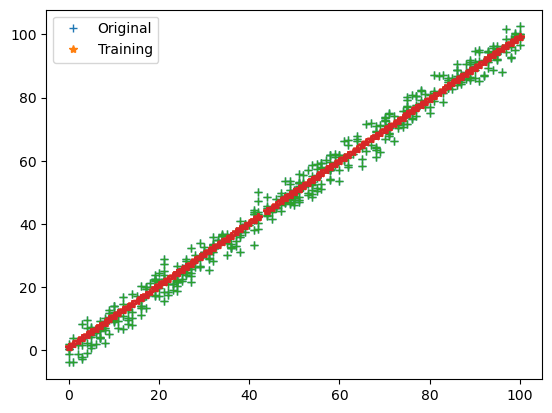

Iteration : 20 , Loss : 4.078706201466472


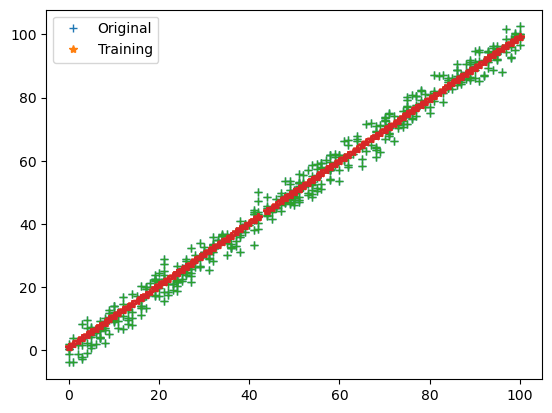

In [15]:
parameters , loss = train(train_input , train_output , 0.0001 ,20)

In [16]:
print(parameters)

{'m': 0.9834221721870912, 'c': 0.9199215966390625}


In [17]:
loss

[70.34799208062756,
 34.14522327669037,
 17.719982334514533,
 10.267827689858386,
 6.886772237580583,
 5.35277899843563,
 4.656799931504786,
 4.341028822960016,
 4.197758486502482,
 4.132751941643366,
 4.103253765954107,
 4.089865776921191,
 4.083786997651992,
 4.081024415181999,
 4.079766395106368,
 4.079190996888975,
 4.078925305198147,
 4.078800127934838,
 4.0787387024563,
 4.078706201466472]

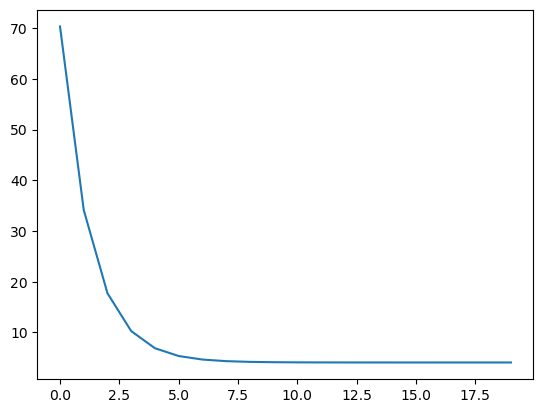

In [18]:
plt.plot(loss)

### Let's Predict

In [19]:
test_prediction = test_input * parameters['m'] + parameters['c']

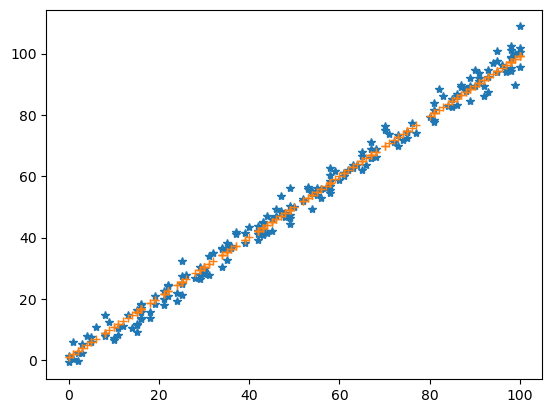

In [20]:
plt.plot(test_input,test_output, "*")
plt.plot(test_input,test_prediction , "+")
plt.show()

### Cost of prediction

In [21]:
cost_function(test_output, test_prediction)

4.054685047486289

In [22]:
# pred +- 4.058